In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# from sklearn.metrics import f1_score
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import glob
print(os.listdir("../input"))


['he_challenge_data']


In [2]:
np.random.seed(42)

In [3]:
from pathlib import Path
from fastai import *
from fastai.vision import *
import torch
from fastai.callbacks.hooks import *

In [4]:
## set the data folder
data_folder = Path("../input")

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import glob

In [7]:
from pathlib import Path
from fastai import *
from fastai.vision import *
import torch
from fastai.callbacks.hooks import *

In [8]:
cd /kaggle/input/he_challenge_data/data

/kaggle/input/he_challenge_data/data


In [9]:
ls

sample_submission.csv  test.csv       train/     trainfinal.csv
test/                  testfinal.csv  train.csv


In [ ]:
train=pd.read_csv("trainfinal.csv")
test=pd.read_csv("testfinal.csv")
train.head(), test.head()

In [ ]:
del test['category']

In [ ]:
train['image_id']= train['image_id'].astype(str) + '.jpg'
train.head(5)

In [ ]:
test['image_id']= test['image_id'].astype(str) + '.jpg'
test.head(5)

In [ ]:
submission = pd.DataFrame({'image_id': train['image_id'], 'category': train['category']})
submission.head(10)

In [ ]:
#submission.to_csv('trainfinal.csv', index=False)
train.to_csv("../input/HE_Challenge_data/data/train.csv", index= False)

In [ ]:
path = "/kaggle/input/he_challenge_data/data"

In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [ ]:
!curl -s https://course.fast.ai/setup/colab | bash

In [ ]:
!pip install https://github.com/fastai/fastai/archive/1.0.49.zip

In [ ]:
from fastai.vision import *
from fastai.callbacks import *

In [ ]:
!pip install fastai

In [ ]:
cd /kaggle/input/he_challenge_data/data

In [ ]:
sys.setrecursionlimit(50000)


In [ ]:
data = ImageDataBunch.from_csv(path=path, folder='train', csv_labels='trainfinal.csv', test='test', ds_tfms=get_transforms(), size=128, bs=128).normalize(imagenet_stats)

In [ ]:

get_transforms()

In [ ]:
data.show_batch()

In [ ]:
print(data.classes)
len(data.classes),data.c

In [ ]:
ls

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=[error_rate, accuracy], model_dir="/tmp/model/")


In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.save('stage-1')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=10)

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

In [ ]:
learn.load('stage-1');

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.load('stage-1');
learn.unfreeze()
learn.fit_one_cycle(2)

In [ ]:
learn50 = create_cnn(data, models.resnet50, metrics=error_rate, model_dir="/tmp/model/")

In [ ]:
learn50.lr_find()
learn50.recorder.plot()

In [ ]:
learn50.fit_one_cycle(8)

In [ ]:
learn50.save('stage-1-50')

In [ ]:
learn50.load('stage-1-50')
learn50.unfreeze()
learn50.fit_one_cycle(5, max_lr=slice(1e-4,1e-2))

In [ ]:
log_preds, test_labels = learn50.get_preds(ds_type=DatasetType.Test)

In [ ]:
preds = np.argmax(log_preds, 1)
preds

In [ ]:
import numpy as np
import pandas as pd

In [ ]:

a = np.array(preds)
a

In [ ]:
a=a+1

In [ ]:
a.min()

In [ ]:
print(data.test_ds.x[0])

In [ ]:
df = pd.DataFrame({'image_id':test['image_id'], 'category':a}, columns=['image', 'category'])
df.to_csv('submission.csv', index=False)

In [ ]:
from IPython.display import HTML
def create_download_link(title = "Download CSV file", filename = "data.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

In [ ]:
create_download_link(filename = 'submission.csv')

In [ ]:
sizes = [32, 64, 128, 224]

In [ ]:
def get_data(sz, bs):
  data = ImageDataBunch.from_csv(path=path, folder='train', csv_labels='trainfinal.csv', test='test', ds_tfms=get_transforms(), size=sz, bs=bs).normalize(imagenet_stats)
  return data

In [ ]:
learn50 = create_cnn(get_data(8, int(2048/8)), models.resnet50, metrics=error_rate, model_dir="/tmp/model/")
learn50.save('res50_0')
learn50.save('res50_8')
learn50 = create_cnn(get_data(16, int(2048/16)), models.resnet50, metrics=error_rate, model_dir="/tmp/model/").load('res50_8')
learn50.save('res50_16')
learn50 = create_cnn(get_data(24, int(2048/24)), models.resnet50, metrics=error_rate, model_dir="/tmp/model/").load('res50_16')
learn50.save('res50_24')
learn50 = create_cnn(get_data(32, int(2048/32)), models.resnet50, metrics=error_rate, model_dir="/tmp/model/").load('res50_24')
learn50.save('res50_32')
learn50 = create_cnn(get_data(64, int(2048/64)), models.resnet50, metrics=error_rate, model_dir="/tmp/model/").load('res50_32')
learn50.save('res50_64')
learn50 = create_cnn(get_data(128, int(2048/128)), models.resnet50, metrics=error_rate, model_dir="/tmp/model/").load('res50_64')
learn50.save('res50_128')
learn50 = create_cnn(get_data(224, int(2048/224)), models.resnet50, metrics=error_rate, model_dir="/tmp/model/").load('res50_128')
learn50.save('res50_224')

In [ ]:
def train_model(sz, i):
  learn50 = cnn_learner(get_data(sz, int(2048/sz)), models.resnet50, metrics=[error_rate, accuracy], model_dir="/tmp/model/").load('res50_'+str(sz-8))
  learn50.fit_one_cycle(6*i)
  learn50.lr_find()
  learn50.recorder.plot()
  learn50.unfreeze()
  learn50.fit_one_cycle(2*i)
  learn50.save('res50_'+str(sz))

In [106]:
from PIL import Image

In [107]:
train.head(5),test.head(5)

(  image_id label
 0    0.jpg    77
 1    1.jpg    81
 2    2.jpg    52
 3    3.jpg    72
 4    4.jpg    58,     image_id  category
 0  18540.jpg        77
 1  18541.jpg        47
 2  18542.jpg        19
 3  18543.jpg        30
 4  18544.jpg        19)

In [108]:
train_images=np.array(train.iloc[:,0])
train_images

array(['0.jpg', '1.jpg', '2.jpg', '3.jpg', ..., '18536.jpg', '18537.jpg', '18538.jpg', '18539.jpg'], dtype=object)

In [109]:
img_dir='/kaggle/input/he_challenge_data/data/train/'

In [110]:
train_images=np.array(train.iloc[:,0])
imagearr=[]
for i in train_images:
    img=Image.open(img_dir+i).convert('L')
    img=img.resize((150,150),Image.ANTIALIAS)
    imagearr.append(np.array(img))

In [113]:
imagearr[0]

array([[76, 72, 66, 59, ..., 41, 38, 38, 41],
       [72, 66, 59, 56, ..., 45, 44, 41, 43],
       [63, 56, 52, 54, ..., 49, 47, 42, 41],
       [58, 56, 55, 51, ..., 49, 50, 44, 41],
       ...,
       [12,  9,  8,  8, ..., 27, 26, 42, 41],
       [11, 10,  7,  8, ..., 25, 28, 29, 48],
       [12, 10, 11, 22, ..., 23, 29, 27, 33],
       [16, 30, 47, 64, ..., 26, 28, 28, 32]], dtype=uint8)

(18540, 150, 150, 1)


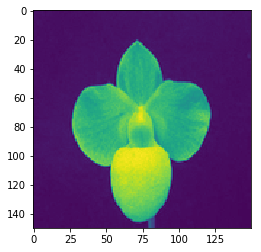

In [115]:
trainImages = np.array([i for i in imagearr]).reshape(-1, 150, 150, 1)
print(trainImages.shape)
plt.imshow(np.asarray(imagearr)[5])

In [36]:
img_dir='/kaggle/input/he_challenge_data/data/test/'
test_images=np.array(test.iloc[:,0])
imagearr=[]
for i in test_images:
    img=Image.open(img_dir+i).convert('L')
    img=img.resize((150,150),Image.ANTIALIAS)
    imagearr.append(np.array(img))

In [37]:
# np.asarray(imagearr)
testImages = np.array([i for i in imagearr]).reshape(-1, 150, 150, 1)
print(testImages.shape)

(2009, 150, 150, 1)


In [100]:
trainLabels = train['label'].values
from keras.utils import np_utils
trainLabels.shape
trainLabels = np_utils.to_categorical(trainLabels)

In [101]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np


In [102]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (5, 5), activation='relu', input_shape=(150, 150, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(103, activation = 'softmax'))

In [103]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])

In [104]:
model.fit(trainImages, trainLabels, batch_size = 100, epochs = 5, verbose = 1)

Epoch 1/5
18540/18540 [==============================] - 11s 618us/step - loss: 4.1143 - acc: 0.0963
Epoch 2/5
18540/18540 [==============================] - 10s 544us/step - loss: 3.4578 - acc: 0.1921
Epoch 3/5
18540/18540 [==============================] - 10s 542us/step - loss: 2.9879 - acc: 0.2721
Epoch 4/5
18540/18540 [==============================] - 10s 543us/step - loss: 2.6459 - acc: 0.3416
Epoch 5/5
18540/18540 [==============================] - 10s 543us/step - loss: 2.3595 - acc: 0.3995


In [105]:
predictions = model.predict_classes(testImages)
predictions

array([99, 65, 65, 46, ..., 46, 37, 55, 65])

In [57]:
predictions

array([ 30,  40,  19, 100, ...,  51,  77,  51,  51])

In [94]:

test['category']=predictions
test.head()

,image_id,category
0,18540.jpg,77
1,18541.jpg,47
2,18542.jpg,19
3,18543.jpg,30
4,18544.jpg,19


In [95]:
cd /kaggle/working

/kaggle/working


In [96]:
df = pd.DataFrame({'image_id':test['image_id'], 'label':predictions}, columns=['image', 'label'])
df.to_csv('submission1.csv', index=False)

In [97]:
from IPython.display import HTML
def create_download_link(title = "Download CSV file", filename = "data.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

In [98]:
create_download_link(filename = 'submission1.csv')